# Modeling Exercises
Do your work for this exercise in a jupyter notebook named ```modeling``` within the ```regression-exercises``` repo. ```Add```, ```commit```, and ```push``` your work.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Decision Tree and Model Evaluation Imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

# assists with processor speed
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000

import matplotlib.pyplot as plt
# Increases Display Resolution for Graphs 
# Only works inside notebook
%matplotlib inline 

# import Environment and Helper Files
from env import user, password, host
#import QMCBT_00_quicktips as qt
#import QMCBT_01_acquire as acquire
#import QMCBT_02_prepare as prepare
#import QMCBT_03_explore as explore
#import QMCBT_04_modeling as model
#import QMCBT_05_evaluate as evaluate
import QMCBT_explore_evaluate as ee
import QMCBT_wrangle as w

# set constants
α = 0.05
alpha = 0.05
np.random.seed(1992)
#random_state=1992

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

In [2]:
# allows import reload without needing to clear kernel and rerun
# reload(packagename) 
from importlib import reload

# This code refreshes all of my helper files (w/o the need to stop the kernel)
#reload(qt)
#reload(acquire)
#reload(prepare)
#reload(explore)
#reload(model)
#reload(evaluate)
reload(ee)
reload(w)

<module 'QMCBT_wrangle' from '/Users/qmcbt/codeup-data-science/regression-exercises/QMCBT_wrangle.py'>

#### This CSS code allows the left alignment of tables in Jupyter Notebooks

In [3]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

# 1. Select a dataset with a continuous target variable.

In [4]:
# use custom wrangle function to automate Acquire and Prepare
df = w.wrangle_zillow()

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2013746,2013747,2013748,2013749,2013750,2013751,2013752,2013753,2013754,2013755
bedrooms,4,3,3,3,3,3,4,3,4,3,...,4,3,3,3,4,3,4,4,3,4
bathrooms,2.0,4.0,2.0,1.0,2.0,2.0,4.0,2.5,3.5,2.5,...,3.0,2.5,3.5,2.0,2.0,2.5,3.0,4.5,2.5,4.0
bath_to_bed_ratio,2.0,0.75,1.5,3.0,1.5,1.5,1.0,1.2,1.1429,1.2,...,1.3333,1.2,0.8571,1.5,2.0,1.2,1.3333,0.8889,1.2,1.0
sqft,3633,1620,2077,1244,1300,1222,4144,1821,2684,2284,...,2541,2033,1980,1917,1987,1809,2262,3127,1974,2110
yearbuilt,2005,2011,1926,1950,1950,1951,2016,2013,2014,2014,...,2013,2015,2014,1946,1955,2012,2015,2014,2015,2014
age,12,6,91,67,67,66,1,4,3,3,...,4,2,3,71,62,5,2,3,2,3
tax_appraisal,296425,847770,646760,169471,233266,290492,1303522,537949,644990,934353,...,1156108,641757,773358,408680,259913,405547,960756,536061,424353,554009
tax_bill,6941.39,10244.94,7924.68,2532.88,3110.99,3870.25,14820.1,6173.72,7572.58,13273.94,...,15568.38,10009.46,8347.9,4341.32,3175.66,4181.1,13494.52,6244.16,5302.7,6761.2
tax_percentage,0.0234,0.0121,0.0123,0.0149,0.0133,0.0133,0.0114,0.0115,0.0117,0.0142,...,0.0135,0.0156,0.0108,0.0106,0.0122,0.0103,0.014,0.0116,0.0125,0.0122
fips,6037,6037,6037,6037,6037,6037,6037,6059,6059,6059,...,6059,6059,6059,6111,6059,6059,6059,6059,6059,6037


# 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [6]:
# use predefined function to split data for train, validate, and test
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (2013756, 12)

      Train: (1208253, 12) - 60.0%
   Validate: (402751, 12) - 20.0%
       Test: (402752, 12) - 20.0%


In [7]:
# split data and target for evaluation of models
target = 'tax_appraisal'
feature_cols = ['bedrooms', 'bathrooms', 'sqft']

w.Xy_split(feature_cols, target, train, validate, test)

_______________________________________________________________
|                              DF                             |
|-------------------:-------------------:---------------------|
|       Train       |       Validate    |          Test       |
|-------------------:-------------------:---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:-------------------------------------------------------------:


   X_train: (1208253, 3)   Index(['bedrooms', 'bathrooms', 'sqft'], dtype='object')
   y_train: (1208253,)     Index(tax_appraisal)

X_validate: (402751, 3)   Index(['bedrooms', 'bathrooms', 'sqft'], dtype='object')
y_validate: (402751,)     Index(tax_appraisal)

    X_test: (402752, 3)   Index(['bedrooms', 'bathrooms', 'sqft'], dtype='object')
    y_test: (402752,)     Index(tax_appraisal)


(         bedrooms  bathrooms  sqft
 0               4        2.0  1404
 1               2        1.5   960
 2               3        3.5  4219
 3               3        2.0  1765
 4               3        1.0  1348
 ...           ...        ...   ...
 1208248         3        2.0  2162
 1208249         4        3.0  1924
 1208250         4        5.5  5992
 1208251         4        2.5  1485
 1208252         4        3.0  2610
 
 [1208253 rows x 3 columns],
 0           288931
 1           356000
 2          1937246
 3           225118
 4           583024
             ...   
 1208248     283187
 1208249     436158
 1208250    1446907
 1208251     303738
 1208252     596966
 Name: tax_appraisal, Length: 1208253, dtype: Int64,
         bedrooms  bathrooms  sqft
 0              4        2.0  1144
 1              4        2.0  2046
 2              3        2.0  1505
 3              3        2.0  1559
 4              3        2.0  1399
 ...          ...        ...   ...
 402746         4  

In [8]:
train.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
bedrooms,4,2,3,3,3,4,4,3,6,4,2
bathrooms,2.0,1.5,3.5,2.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0,2.0,2.0,1.5,2.0,1.3333,2.0
sqft,1404,960,4219,1765,1348,1582,1233,1255,3034,2265,940
yearbuilt,1956,1963,1985,1954,1942,1977,1953,1961,1929,1924,1950
age,61,54,32,63,75,40,64,56,88,93,67
tax_appraisal,288931,356000,1937246,225118,583024,335280,65393,487622,1507103,299363,483000
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33,4213.39,1241.64,5640.2,17337.68,4900.98,5754.13
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012,0.0126,0.019,0.0116,0.0115,0.0164,0.0119
fips,6037,6059,6059,6037,6037,6037,6037,6059,6037,6037,6037


# 3. Work through **all** of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

## Predictions

In [10]:
predictions = pd.DataFrame({'actual': validate.tax_appraisal
                            })
predictions.head()

,actual
0,245831
1,332530
2,1033016
3,284516
4,141509


<div class="alert alert-warning">



## Simple Model

$$ y = mx + b $$

$$y = f(x)$$

In [11]:
from sklearn.linear_model import LinearRegression

# X must be 2-d
X_train = train[['sqft']]
# y can be 1-d
y_train = train.tax_appraisal

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train, y_train)
# 3. use the thing (make predictions)
X_validate = validate[['sqft']]
predictions['simple_lm'] = lm.predict(X_validate)

In [12]:
predictions.head()

,actual,simple_lm
0,245831,255079.168540
1,332530,462099.482817
2,1033016,337933.196760
3,284516,350326.874111
4,141509,313604.867144


### Examine The Model

- **intercept**: Value we predict if x is 0. Depending on our x variables, this may not be valuable
- **coefficients**: define how our prediction changes as x changes. A one-unit increase in x causes our model to predict a `coef` unit change in y, holding all other independent variables constant

In [13]:
lm.coef_, lm.intercept_

(array([229.51254354]), -7483.181273323076)

In [14]:
print('tax_appraisal (y) = {:.3f} * sqft (X) + {:.3f}'.format(lm.coef_[0], lm.intercept_))

tax_appraisal (y) = 229.513 * sqft (X) + -7483.181


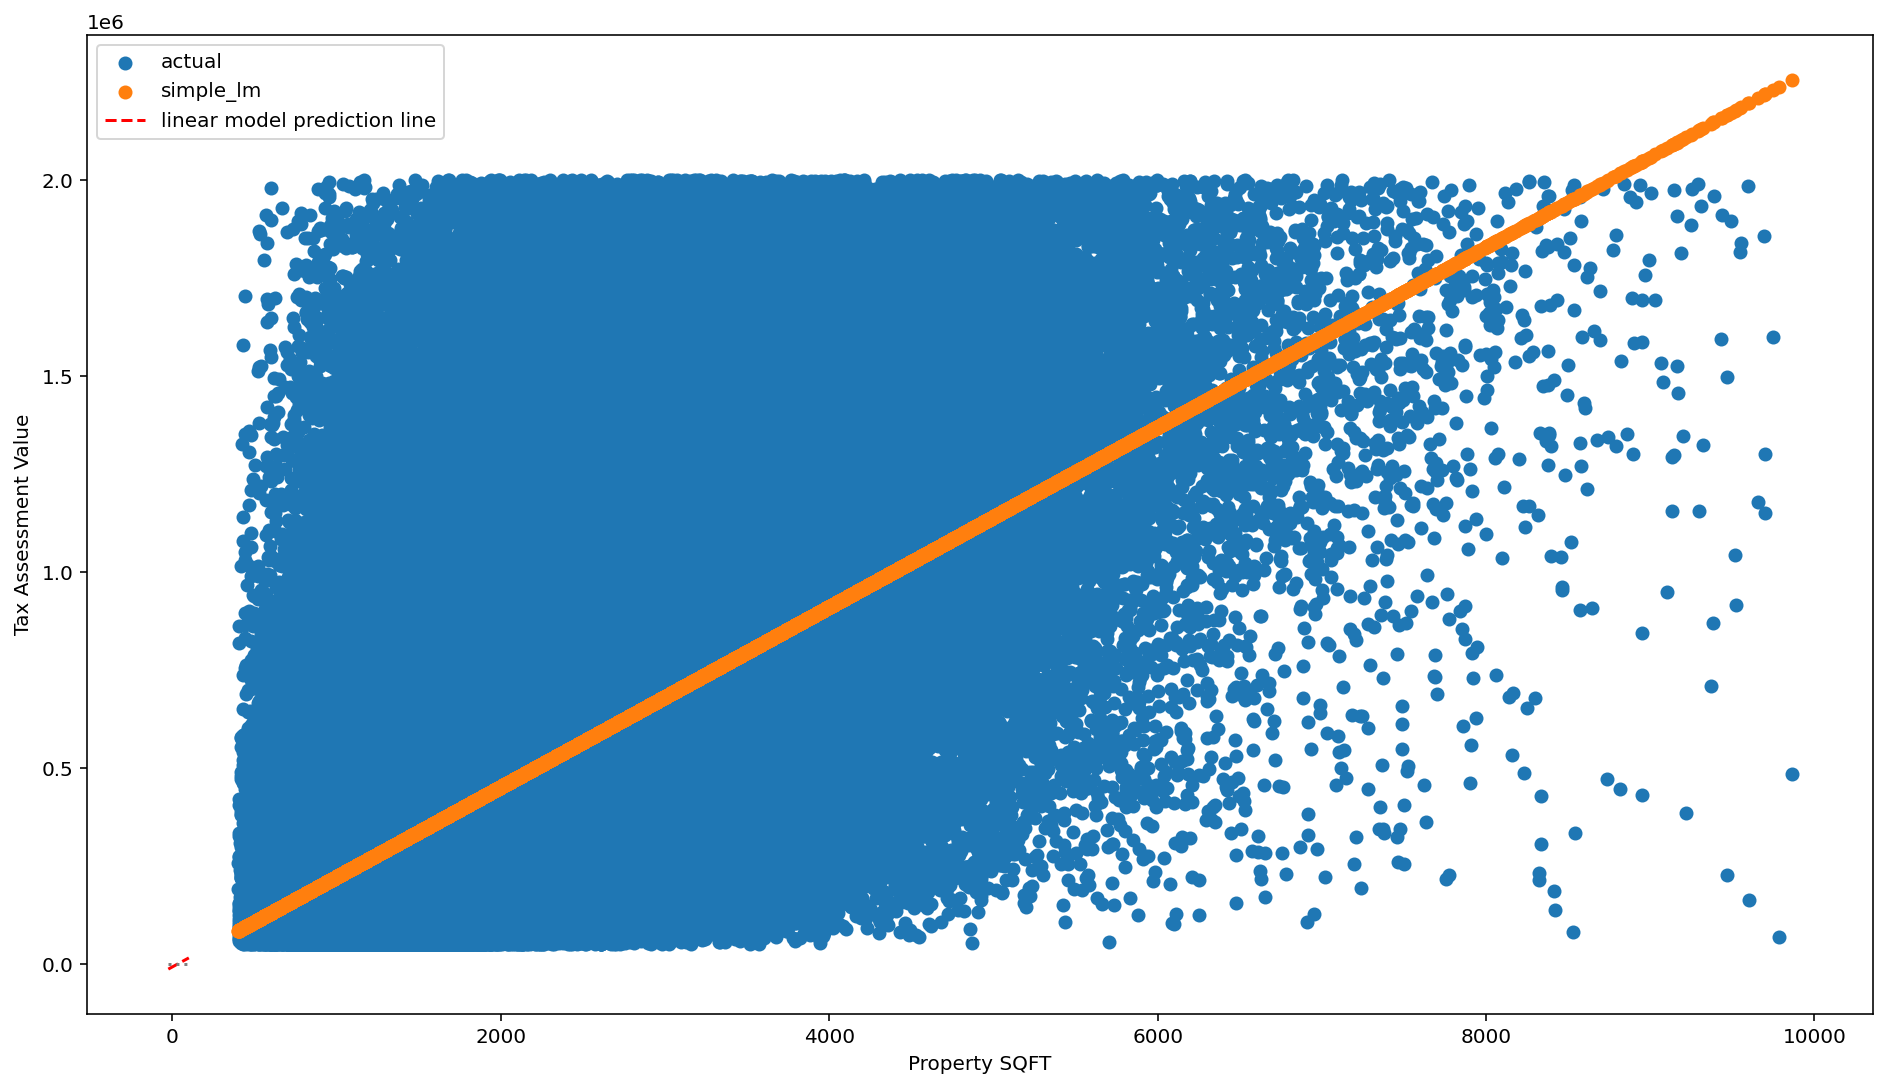

In [15]:
x_pred = np.array([-25, 100]).reshape(-1, 1)
y_pred = lm.predict(x_pred)

plt.figure(figsize=(16, 9))
plt.scatter(train.sqft, train.tax_appraisal, label='actual')
plt.scatter(train.sqft, lm.predict(train[['sqft']]), label='simple_lm')
plt.plot(x_pred, y_pred, ls='--', c='red', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')

plt.xlabel('Property SQFT')
plt.ylabel('Tax Assessment Value')
plt.legend()

### Model Interpretation

In [16]:
# tax_appraisal (y) = 248.723 * sqft (X) + -17472.733

print(f'For every 1 foot increase in Property SQFT, we predict a {lm.coef_[0]:.2f} dollar increase in Tax Assessment Value')

For every 1 foot increase in Property SQFT, we predict a 229.51 dollar increase in Tax Assessment Value


In [17]:
SQFT = np.arange(1000, 2500)
tax_appraisal = lm.predict(SQFT.reshape(-1, 1))
pd.DataFrame(dict(SQFT=SQFT, predicted_tax_appraisal=tax_appraisal))

,SQFT,predicted_tax_appraisal
0,1000,222029.362270
1,1001,222258.874814
2,1002,222488.387357
3,1003,222717.899901
4,1004,222947.412444
...,...,...
1495,2495,565150.614868
1496,2496,565380.127411
1497,2497,565609.639955
1498,2498,565839.152498


<div class="alert alert-warning">


## Multiple Regression + RFE

$$ y = m_1x_1 + m_2x_2 + b $$

$$ y = f(x1, x2, ...) $$

In [25]:
X_train = train.drop(columns=['county', 'state', 'tax_appraisal'])
y_train = train.tax_appraisal
X_validate = validate.drop(columns=['county', 'state', 'tax_appraisal'])

lm = LinearRegression()
k = 2

# 1. Transform our X
rfe = RFE(lm, n_features_to_select=2)
rfe.fit(X_train, y_train)
print('selected top 2 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)

selected top 2 features: Index(['yearbuilt', 'age'], dtype='object')


In [26]:
X_train.shape

(1208253, 9)

In [27]:
X_train_rfe.shape

(1208253, 2)

In [28]:
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)

# 3. Make predictions
X_validate_rfe = rfe.transform(X_validate)
predictions['multiple_rfe'] = lm.predict(X_validate_rfe)

predictions.head()

,actual,simple_lm,multiple_rfe
0,245831,255079.168540,410752.0
1,332530,462099.482817,448632.0
2,1033016,337933.196760,418332.0
3,284516,350326.874111,380452.0
4,141509,313604.867144,369092.0


### Examine the Model

In [29]:
X_train.columns[rfe.support_]

Index(['yearbuilt', 'age'], dtype='object')

In [30]:
lm.coef_, lm.intercept_

(array([-1.02946866e+13, -1.02946866e+13]), 2.076438280251204e+16)

In [31]:
print(f'Tax Assessed Value = {lm.coef_[0]:.2f} x Orange County + {lm.coef_[1]:.2f} x Ventura County + {lm.intercept_:.2f}')

Tax Assessed Value = -10294686565140.89 x Orange County + -10294686568928.55 x Ventura County + 20764382802512040.00


In [32]:
X = pd.DataFrame({
    'Orange County': [0, 1, 0],
    'Ventura County': [1, 0, 0]
})

X['predicted_tax_appraisal'] = lm.predict(X)
X

,Orange County,Ventura County,predicted_tax_appraisal
0,0,1,2.075409e+16
1,1,0,2.075409e+16
2,0,0,2.076438e+16


<div class="alert alert-warning">



## Polynomial Features

First off...what the heck is a polynomial?

$$ y = a_0x^0 + a_1x^1 + a_2x^2 + ... + a_nx^n $$

or a simpler form:

$$ y = a_0 + a_1x + a_2x^2 + ... + a_nx^n $$

`degree = order = n`

What does a polynomial look like when graphed on a coordinate plane? Well it depends on
- The intercept
- The coefficients

Consider this third degree polynomial:

$$ y = 2x + x^3 $$

In [33]:
from sklearn.preprocessing import PolynomialFeatures

X_train = train[['bedrooms', 'bathrooms', 'sqft']]
X_validate = validate[['bedrooms', 'bathrooms', 'sqft']]
y_train = train.tax_appraisal
y_validate = validate.tax_appraisal

<div class="alert alert-warning">


## Polynomial Degree 2

In [34]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head().T

,0,1,2,3,4
bedrooms,4.0,2.00,3.00,3.0,3.0
bathrooms,2.0,1.50,3.50,2.0,1.0
sqft,1404.0,960.00,4219.00,1765.0,1348.0
bedrooms^2,16.0,4.00,9.00,9.0,9.0
bedrooms bathrooms,8.0,3.00,10.50,6.0,3.0
bedrooms sqft,5616.0,1920.00,12657.00,5295.0,4044.0
bathrooms^2,4.0,2.25,12.25,4.0,1.0
bathrooms sqft,2808.0,1440.00,14766.50,3530.0,1348.0
sqft^2,1971216.0,921600.00,17799961.00,3115225.0,1817104.0


In [35]:
# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

X_validate_poly = poly.transform(X_validate)
predictions['polynomial degree 2'] = lm.predict(X_validate_poly)

In [36]:
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2
0,245831,255079.168540,410752.0,200104.680123
1,332530,462099.482817,448632.0,405435.696185
2,1033016,337933.196760,418332.0,341010.896924
3,284516,350326.874111,380452.0,353547.693100
4,141509,313604.867144,369092.0,316003.511148


#### Examine the coefficients of the resulting model.

In [37]:
feature_names = poly.get_feature_names(X_train.columns)
pd.Series(lm.coef_, index=feature_names).sort_values()

bedrooms             -45721.152433
bathrooms            -22159.728788
bedrooms bathrooms   -10209.728049
bedrooms sqft            -1.565460
sqft^2                   -0.023474
bathrooms sqft           39.214606
sqft                    230.354425
bedrooms^2             2050.405752
bathrooms^2            4598.862438
dtype: float64

<div class="alert alert-warning">


## Polynomial Only Interaction

In [38]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X.columns),
    index=train.index,
)
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

X_validate_poly = poly.transform(X_validate)
predictions['polynomial only interaction'] = lm.predict(X_validate_poly)

pd.Series(lm.coef_, index=poly.get_feature_names(X_train.columns)).sort_values()

bedrooms             -42990.150948
bathrooms            -24583.841671
bedrooms sqft           -18.815763
bathrooms sqft           19.991197
sqft                    230.590791
bedrooms bathrooms     9641.308277
dtype: float64

In [39]:
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction
0,245831,255079.168540,410752.0,200104.680123,220181.616153
1,332530,462099.482817,448632.0,405435.696185,396351.354598
2,1033016,337933.196760,418332.0,341010.896924,342713.831996
3,284516,350326.874111,380452.0,353547.693100,354276.630315
4,141509,313604.867144,369092.0,316003.511148,320016.487148


Takeaway: interaction terms can be useful if you suspect there's a multiplicative relationship between independent variables. Higher order polynomial features should be used with caution (usually when you have domain knowledge that says this is the right thing to do).

Example: Telco churn, using monthly charges and tenure to predict total charges. monthly charges times tenure will give us a good number for total charges.

<div class="alert alert-warning">



## Lasso-Lars

Performs intrinsic feature selection and noise reduction to avoid overfitting.

The most important hyperparameter is `alpha`. 
- `alpha` determines the degree of regularization applied to the model. 
- The lowest `alpha` is zero, and this represents no regularization (identical to OLS). 
- There is no limit to `alpha`, but as it rises, it will reach a point where performance no longer changes (often because you've regularized all of your coefficients to zero. 

Generally speaking, the higher the alpha, the lower your risk for overfitting. 

`alpha` = 1.0 is a good place to start.

In [40]:
from sklearn.linear_model import LassoLars

`alpha = 0`

In [41]:
# create the model object
lars = LassoLars(alpha=0)

# fit the model to our training data
lars.fit(X_train, y_train)

# predict validate
X_validate_pred_lars = lars.predict(X_validate)

In [42]:
pd.Series(lars.coef_, index=X_train.columns).sort_values()

bedrooms    -62850.323262
sqft           226.908728
bathrooms    49996.805538
dtype: float64

`alpha = 0.5`

In [43]:
# create the model object
lars = LassoLars(alpha=0.5)

# fit the model to our training data= 
lars.fit(X_train, y_train)

# predict validate
X_validate_pred_lars = lars.predict(X_validate)

In [44]:
pd.Series(lars.coef_, index=X_train.columns).sort_values()

bedrooms    -61057.251446
sqft           225.901137
bathrooms    49003.977902
dtype: float64

`alpha = 1.0`

In [45]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data
lars.fit(X_train, y_train)

# predict validate
X_validate_pred_lars = lars.predict(X_validate)

# Add lassolars predictions to our predictions DataFrame
predictions['lasso_lars'] = X_validate_pred_lars

In [46]:
pd.Series(lars.coef_, index=X_train.columns).sort_values()

bedrooms    -59264.179631
sqft           224.893547
bathrooms    48011.150266
dtype: float64

In [47]:
lars.intercept_

90244.49065995024

`alpha = 2`

In [48]:
# create the model object
lars_high_alpha = LassoLars(alpha=2)

# fit the model to our training data
lars_high_alpha.fit(X_train, y_train)

# predict validate
X_validate_pred_lars_high_alpha = lars.predict(X_validate)

In [49]:
pd.Series(lars_high_alpha.coef_, index=X_train.columns).sort_values()

bedrooms    -55678.036001
sqft           222.878366
bathrooms    46025.494994
dtype: float64

In [50]:
lars_high_alpha.intercept_

86475.67234585964

In [51]:
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction,lasso_lars
0,245831,255079.168540,410752.0,200104.680123,220181.616153,206488.290624
1,332530,462099.482817,448632.0,405435.696185,396351.354598,409342.270167
2,1033016,337933.196760,418332.0,341010.896924,342713.831996,346939.040782
3,284516,350326.874111,380452.0,353547.693100,354276.630315,359083.292328
4,141509,313604.867144,369092.0,316003.511148,320016.487148,323100.324782


<div class="alert alert-warning">



## Generalized Linear Model

The most flexible regression algorithm, the GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO). We will use the `TweedieRegressor` method to create a GLM using sklearn.

> `sklearn.linear_model.TweedieRegressor(power=0, alpha=1.0)`

* power = 0: Normal Distribution
* power = 1: Poisson Distribution
* power = (1,2): Compound Distribution
* power = 2: Gamma Distribution
* power = 3: Inverse Gaussian Distribution

In [52]:
from sklearn.linear_model import TweedieRegressor

# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data
glm.fit(X_train, y_train)

# predict validate
X_validate_predict_glm = glm.predict(X_validate)

# Add general linear model predictions to our predictions DataFrame
predictions['glm'] = X_validate_predict_glm

In [53]:
pd.Series(glm.coef_, index=X_train.columns).sort_values()

bedrooms     0.0
bathrooms    0.0
sqft         0.0
dtype: float64

In [54]:
glm.intercept_

12.926863350710585

In [55]:
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction,lasso_lars,glm
0,245831,255079.168540,410752.0,200104.680123,220181.616153,206488.290624,411211.660805
1,332530,462099.482817,448632.0,405435.696185,396351.354598,409342.270167,411211.660805
2,1033016,337933.196760,418332.0,341010.896924,342713.831996,346939.040782,411211.660805
3,284516,350326.874111,380452.0,353547.693100,354276.630315,359083.292328,411211.660805
4,141509,313604.867144,369092.0,316003.511148,320016.487148,323100.324782,411211.660805


<div class="alert alert-danger">



### TL;DR

First of all, it always helps to know the distribution of your target variable before modeling.

> `plt.hist(y_train)` to see the shape of your target (`y`).

Secondly, you could try them all...doesn't hurt usually.

Third, if you have a good feel for your data:
- For a normally distributed y and a linear relationship: OLS, LassoLars, GLM(power=0) will work best.
- For polynomial relationships, polynomial regression is best.
- For poisson, gamma or inverse gaussian distributions, use the Generalized Linear Model.

In [56]:
train.columns

Index(['bedrooms', 'bathrooms', 'bath_to_bed_ratio', 'sqft', 'yearbuilt',
       'age', 'tax_appraisal', 'tax_bill', 'tax_percentage', 'fips', 'county',
       'state'],
      dtype='object')

<div class="alert alert-success">



# Evaluation

<div class="alert alert-warning">


## Baseline

In [57]:
# add a baseline model
predictions['baseline'] = train.tax_appraisal.mean()

In [58]:
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction,lasso_lars,glm,baseline
0,245831,255079.168540,410752.0,200104.680123,220181.616153,206488.290624,411211.660805,411211.660805
1,332530,462099.482817,448632.0,405435.696185,396351.354598,409342.270167,411211.660805,411211.660805
2,1033016,337933.196760,418332.0,341010.896924,342713.831996,346939.040782,411211.660805,411211.660805
3,284516,350326.874111,380452.0,353547.693100,354276.630315,359083.292328,411211.660805,411211.660805
4,141509,313604.867144,369092.0,316003.511148,320016.487148,323100.324782,411211.660805,411211.660805


<div class="alert alert-warning">


## Calculate mean squared error for every column in the dataframe

In [59]:
def calculate_mse(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted)

predictions.apply(calculate_mse).sort_values()

actual                         0.000000e+00
polynomial degree 2            6.290671e+10
polynomial only interaction    6.309361e+10
lasso_lars                     6.347721e+10
simple_lm                      6.547850e+10
multiple_rfe                   9.277750e+10
glm                            9.934882e+10
baseline                       9.934882e+10
dtype: float64

In [60]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict target_pred_mean
target_pred_mean = y_train['tax_appraisal'].mean()
y_train['target_pred_mean'] = target_pred_mean
y_validate['target_pred_mean'] = target_pred_mean

# 2. compute target_pred_median
target_pred_median = y_train['tax_appraisal'].median()
y_train['target_pred_median'] = target_pred_median
y_validate['target_pred_median'] = target_pred_median

# 3. RMSE of target_pred_mean
rmse_train = mean_squared_error(y_train.tax_appraisal, y_train.target_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_appraisal, y_validate.target_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.tax_appraisal, y_train.target_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_appraisal, y_validate.target_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  314978.72 
Validate/Out-of-Sample:  315196.49
RMSE using Median
Train/In-Sample:  324926.67 
Validate/Out-of-Sample:  325273.82


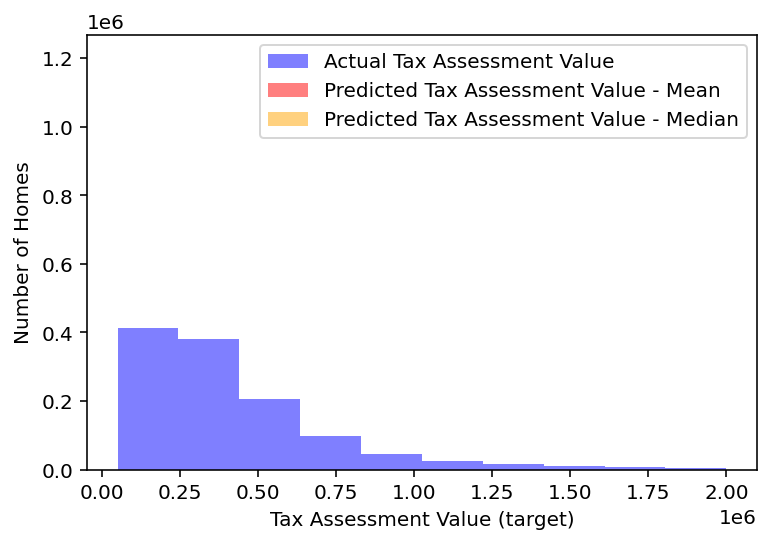

In [61]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tax_appraisal, color='blue', alpha=.5, label="Actual Tax Assessment Value")
plt.hist(y_train.target_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Tax Assessment Value - Mean")
plt.hist(y_train.target_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Tax Assessment Value - Median")
plt.xlabel("Tax Assessment Value (target)")
plt.ylabel("Number of Homes")
plt.legend()
plt.show()

<div class="alert alert-danger">



## Evaluate on Test: Best Model (2nd Degree Polynomial)

Notice this gets a bit more complicated as we have to reproduce any transformations to the data we did when training. Polynomial transformations need to be applied to the test dataframe to evaluate the polynomial model. 

# re-create our polynomial model
X_train = train[['bedrooms', 'bathrooms', 'sqft']]
y_train = train.tax_appraisal

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)

lm = LinearRegression()
lm.fit(X_train_poly, y_train)

# any transformations applied to your training data must be applied to the test as well

X_test = test[['bedrooms', 'bathrooms', 'sqft']]
X_test_poly = poly.transform(X_test)

test_predictions = lm.predict(X_test_poly)
test_actual = test.tax_appraisal

mean_squared_error(test_actual, test_predictions)

# Notes
* 1. Regularization = "Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting." [Towards Data Science](https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea)


* 2. TweedieRegressor: Requires sklearn v0.23 or greater installed. To update, run in terminal: ```conda install scikit-learn=0.23```